# PROBLEM 1

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Importing the required packages

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#### Part (a)

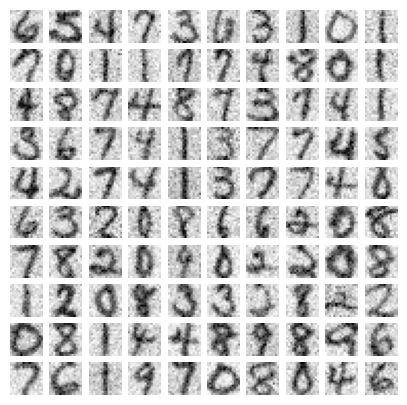

In [4]:
# Loading the dataset and Visualization of the images
df = pd.read_csv('/content/drive/MyDrive/SEM 7/ID5055/Assignment 1/Problem 1/noisy_mnist.csv', header = None)

def plot_mnist_images(data):
    fig, arr = plt.subplots(10, 10, figsize = (5, 5))
    arr = arr.flatten()
    for img, a in zip(data, arr):
        a.imshow(img.reshape(16, 16), cmap = 'Greys')
        a.axis('off')

data = np.array(df)
plot_mnist_images(data)

#### Part (b)

In [5]:
# Normalize the data to the [0, 1] range
normalized_data = (data - np.min(data)) / (np.max(data) - np.min(data))

# Train Test Split
data_train, data_test = train_test_split(normalized_data, train_size = 0.8)

# SVD
u, s, vt = np.linalg.svd(data_train)

# Function to get Principle Components
def get_PC(data, vt, n):
    PC = data@(vt.T)
    return PC[:, :n]

#### Part (c)

In [8]:
# Function to get Reconstruct
def reconst_datamatrix(PC, vt, n):
    new_data = PC@(vt[:n, :])
    return new_data

# Reconstructing the images
n = 100
PC_image = get_PC(data_train, vt, n)
reconstructed_images = reconst_datamatrix(PC_image, vt, n)

#### Part (d)

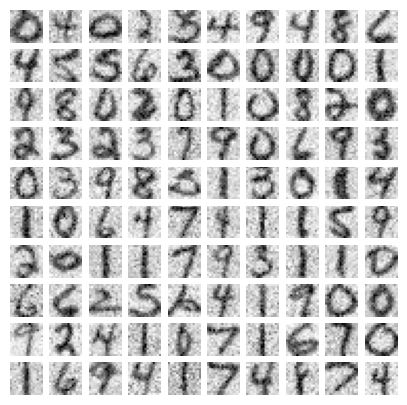

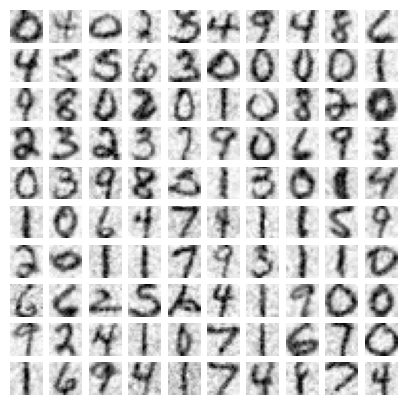

In [9]:
# Plotting the actual and reconstructed images

plot_mnist_images(data_train)
plot_mnist_images(reconstructed_images)

#### Observations
1. When we used n = 1 principle component then the reconstructed image was blur and detials were not clear.
2. As we increased the value of n image became more and more visible and clear and after a certain value of n no further significant improvements were observed.
3. For n = 256, the reconstruced image will be exactly equal to the original image because we are using all the components.